# **Overview**

Bem-vindos ao ano 2912, onde suas habilidades em ciência de dados são necessárias para resolver um mistério cósmico. Recebemos uma transmissão de quatro anos-luz de distância e as coisas não parecem boas.

A nave espacial Titanic foi um transatlântico interestelar de passageiros lançado há um mês. Com quase 13.000 passageiros a bordo, a embarcação partiu em sua viagem inaugural transportando emigrantes do nosso sistema solar para três exoplanetas recém-habitáveis ​​orbitando estrelas próximas.

Ao contornar Alfa Centauri a caminho de seu primeiro destino — a tórrida 55 Cancri E — a incauta nave espacial Titanic colidiu com uma anomalia do espaço-tempo escondida em uma nuvem de poeira. Infelizmente, teve um destino semelhante ao de sua homônima, 1000 anos antes. Embora a nave tenha permanecido intacta, quase metade dos passageiros foi transportada para uma dimensão alternativa!

Para ajudar as equipes de resgate e recuperar os passageiros perdidos, você é desafiado a prever quais passageiros foram transportados pela anomalia usando registros recuperados do sistema de computador danificado da nave espacial.

Ajude a salvá-los e mude a história!

## **Descrições de campos de arquivo e dados**

**train.csv** - Registros pessoais de cerca de dois terços (~8.700) dos passageiros, para serem usados ​​como dados de treinamento.

* PassengerId- Um ID exclusivo para cada passageiro. Cada ID tem o formato gggg_pponde ggggindica o grupo com o qual o passageiro está viajando e ppé o seu número dentro do grupo. As pessoas em um grupo geralmente são membros da família, mas nem sempre.

* HomePlanet- O planeta de onde o passageiro partiu, normalmente seu planeta de residência permanente.

* CryoSleep- Indica se o passageiro optou por ser colocado em animação suspensa durante toda a viagem. Passageiros em sono criogênico ficam confinados em suas cabines.

* Cabin- O número da cabine onde o passageiro está hospedado. Assume o formato deck/num/side, onde sidepode ser Ppara bombordo ou Sestibordo .

* Destination- O planeta para onde o passageiro desembarcará.

* Age- A idade do passageiro.

* VIP- Se o passageiro pagou por serviço VIP especial durante a viagem.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- Valor cobrado pelo passageiro em cada uma das muitas comodidades de luxo da Spaceship Titanic .

* Name- O primeiro e último nome do passageiro.

* Transported- Se o passageiro foi transportado para outra dimensão. Este é o alvo, a coluna que você está tentando prever.

**test.csv -** Registros pessoais do terço restante (~4.300) dos passageiros, para serem usados ​​como dados de teste. Sua tarefa é prever o valor de Transportedpara os passageiros neste conjunto.

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# **Análise Exploratória de Dados**

## **Carregar os dados**

In [329]:
train = pd.read_csv('dados/train.csv')
test = pd.read_csv('dados/test.csv')

In [330]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [331]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [332]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [333]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [334]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [335]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


## **Análise de valores ausentes**

In [336]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [337]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## **Visualizações**

In [338]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


HomePlanet

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\4250277672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='HomePlanet', palette='Dark2')


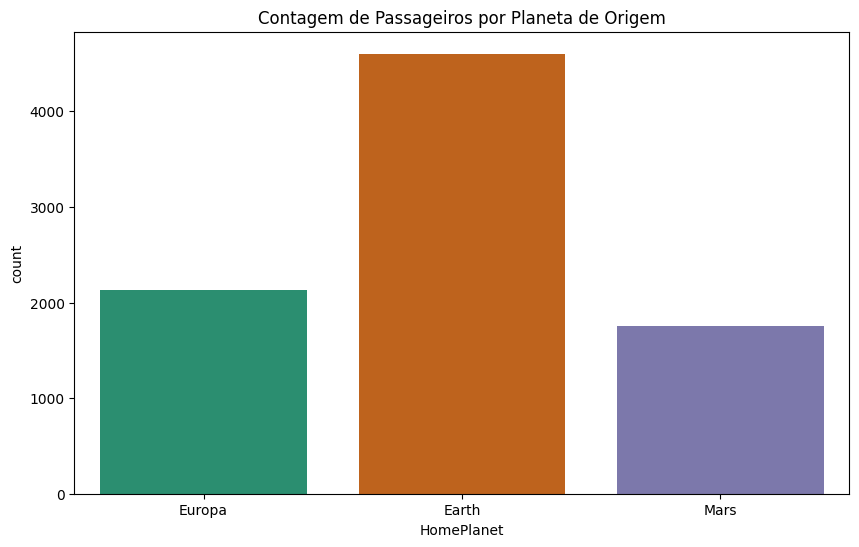

In [339]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='HomePlanet', palette='Dark2')    
plt.title("Contagem de Passageiros por Planeta de Origem")
plt.show()

CryoSleep

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\1002995590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='CryoSleep', palette='Dark2')


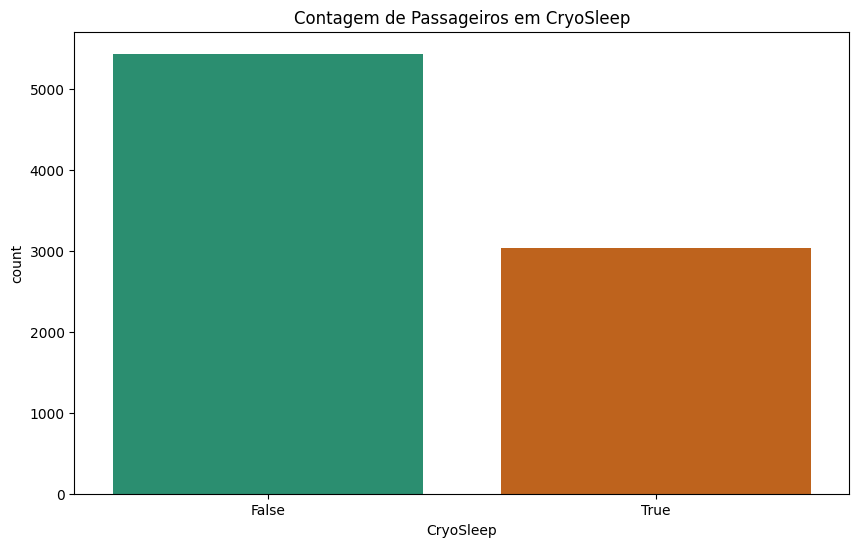

In [340]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='CryoSleep', palette='Dark2')
plt.title("Contagem de Passageiros em CryoSleep")
plt.show()

Destination

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\2605770220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Destination', palette='Dark2')


Text(0.5, 1.0, 'Contagem de Passageiros por Destino')

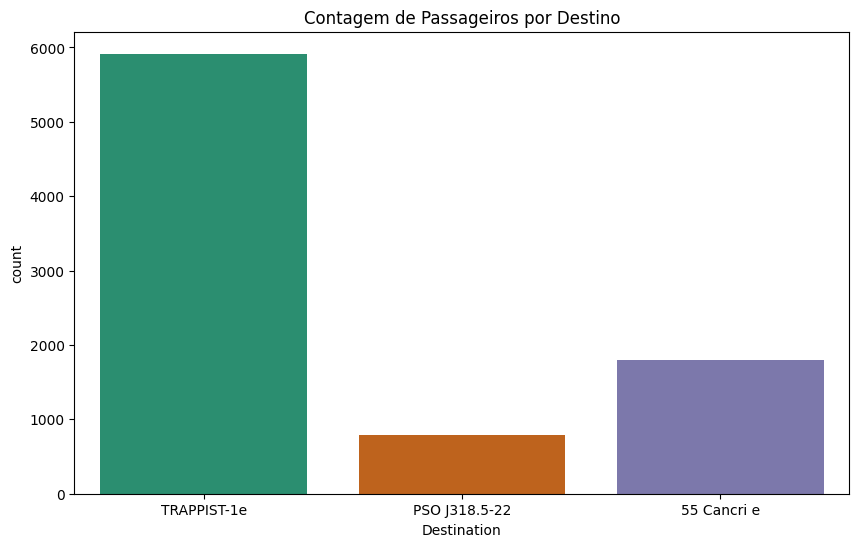

In [341]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='Destination', palette='Dark2')
plt.title("Contagem de Passageiros por Destino")

Age

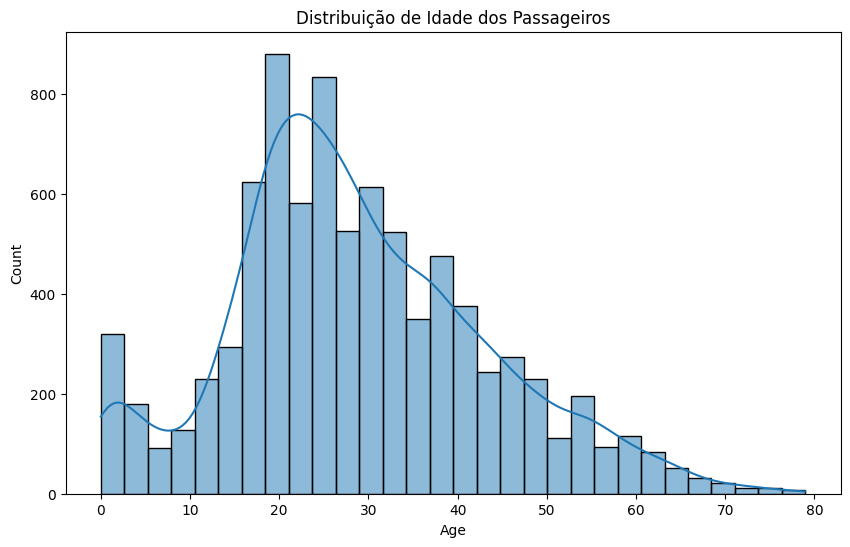

In [342]:
plt.figure(figsize=(10,6))
sns.histplot(train['Age'], bins=30, kde=True, color='tab:blue')
plt.title("Distribuição de Idade dos Passageiros")
plt.show()

VIP

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\1228751917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='VIP', palette='Dark2')


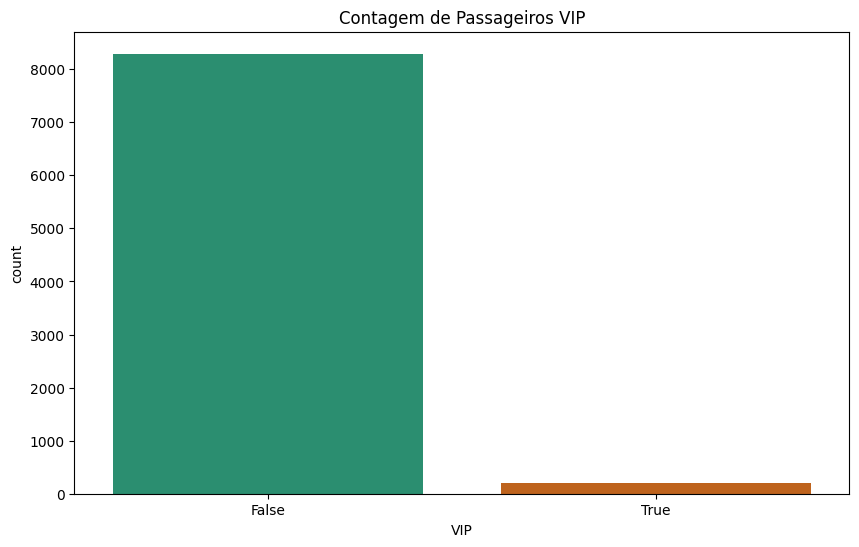

In [343]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='VIP', palette='Dark2')
plt.title("Contagem de Passageiros VIP")
plt.show()

Transported

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\1730291646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Transported', palette='Dark2')


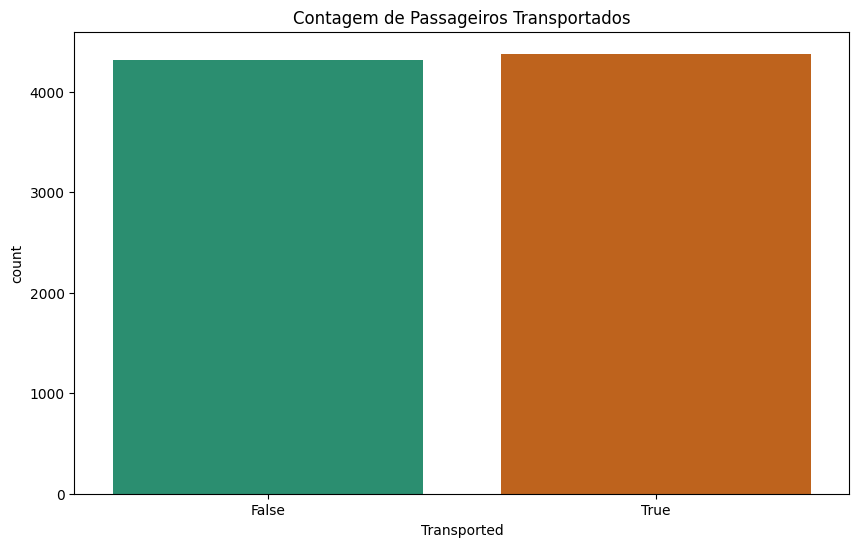

In [344]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='Transported', palette='Dark2')
plt.title("Contagem de Passageiros Transportados")
plt.show()

# **Pré-processamento dos Dados**

## **Tratamento de valores ausentes**

In [345]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [346]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [347]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

HomePlanet

In [348]:
train.HomePlanet.isnull().sum()

np.int64(201)

In [349]:
test.HomePlanet.isnull().sum()

np.int64(87)

In [350]:
train.HomePlanet.mode()

0    Earth
Name: HomePlanet, dtype: object

In [351]:
train.HomePlanet.fillna(train.HomePlanet.mode()[0], inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\914579391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.HomePlanet.fillna(train.HomePlanet.mode()[0], inplace=True)


In [352]:
test.HomePlanet.fillna(test.HomePlanet.mode()[0], inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\2711928305.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.HomePlanet.fillna(test.HomePlanet.mode()[0], inplace=True)


In [353]:
train.HomePlanet.isnull().sum()

np.int64(0)

In [354]:
test.HomePlanet.isnull().sum()

np.int64(0)

CryoSleep

In [355]:
train.CryoSleep.isnull().sum()

np.int64(217)

In [356]:
test.CryoSleep.isnull().sum()

np.int64(93)

In [357]:
train.CryoSleep.fillna(train.CryoSleep.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\561003486.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.CryoSleep.fillna(train.CryoSleep.median(), inplace=True)


In [358]:
test.CryoSleep.fillna(test.CryoSleep.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\1074036909.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.CryoSleep.fillna(test.CryoSleep.median(), inplace=True)


In [359]:
train.CryoSleep.isnull().sum()

np.int64(0)

In [360]:
train.CryoSleep.isnull().sum()

np.int64(0)

Cabin

In [361]:
train.Cabin.isnull().sum()

np.int64(199)

In [362]:
test.Cabin.isnull().sum()

np.int64(100)

In [363]:
train.Cabin.mode()

0    G/734/S
Name: Cabin, dtype: object

In [364]:
train.Cabin.fillna(train.Cabin.mode()[0], inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\3719009225.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Cabin.fillna(train.Cabin.mode()[0], inplace=True)


In [365]:
test.Cabin.fillna(test.Cabin.mode()[0], inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\3893863883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Cabin.fillna(test.Cabin.mode()[0], inplace=True)


In [366]:
train.Cabin.isnull().sum()

np.int64(0)

In [367]:
test.Cabin.isnull().sum()

np.int64(0)

Destination

In [368]:
train.Destination.isnull().sum()

np.int64(182)

In [369]:
test.Destination.isnull().sum()

np.int64(92)

In [370]:
train.Destination.mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

In [371]:
train.Destination.isnull().sum()

np.int64(182)

In [372]:
train.Destination.fillna(train.Destination.mode()[0], inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\1128778718.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Destination.fillna(train.Destination.mode()[0], inplace=True)


In [373]:
test.Destination.fillna(test.Destination.mode()[0], inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\3771537814.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Destination.fillna(test.Destination.mode()[0], inplace=True)


In [374]:
train.Destination.isnull().sum()

np.int64(0)

In [375]:
test.Destination.isnull().sum()

np.int64(0)

Age

In [376]:
train.Age.isnull().sum()

np.int64(179)

In [377]:
test.Age.isnull().sum()

np.int64(91)

In [378]:
train.Age.mean()

np.float64(28.82793046746535)

In [379]:
train.Age.fillna(train.Age.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\262257643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Age.fillna(train.Age.mean(), inplace=True)


In [380]:
test.Age.fillna(test.Age.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\3856606113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Age.fillna(test.Age.mean(), inplace=True)


In [381]:
train.Age.isnull().sum()

np.int64(0)

In [382]:
test.Age.isnull().sum()

np.int64(0)

VIP

In [383]:
train.VIP.isnull().sum()

np.int64(203)

In [384]:
test.VIP.isnull().sum()

np.int64(93)

In [385]:
train.VIP.median()

np.float64(0.0)

In [386]:
train.VIP.fillna(train.VIP.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\614260637.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.VIP.fillna(train.VIP.median(), inplace=True)


In [387]:
test.VIP.fillna(test.VIP.median(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\1936569269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.VIP.fillna(test.VIP.median(), inplace=True)


In [388]:
train.VIP.isnull().sum()

np.int64(0)

In [389]:
test.VIP.isnull().sum()

np.int64(0)

RoomService

In [390]:
train.RoomService.isnull().sum()

np.int64(181)

In [391]:
test.RoomService.isnull().sum()

np.int64(82)

In [392]:
train.RoomService.mean()

np.float64(224.687617481203)

In [393]:
train.RoomService.fillna(train.RoomService.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\303782621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.RoomService.fillna(train.RoomService.mean(), inplace=True)


In [394]:
test.RoomService.fillna(test.RoomService.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\1064670057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.RoomService.fillna(test.RoomService.mean(), inplace=True)


In [395]:
train.RoomService.isnull().sum()

np.int64(0)

In [396]:
test.RoomService.isnull().sum()

np.int64(0)

FoodCourt

In [397]:
train.FoodCourt.isnull().sum()

np.int64(183)

In [398]:
test.FoodCourt.isnull().sum()

np.int64(106)

In [399]:
train.FoodCourt.mean()

np.float64(458.07720329024676)

In [400]:
train.FoodCourt.fillna(train.FoodCourt.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\1789697542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.FoodCourt.fillna(train.FoodCourt.mean(), inplace=True)


In [401]:
test.FoodCourt.fillna(test.FoodCourt.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\2723687559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.FoodCourt.fillna(test.FoodCourt.mean(), inplace=True)


In [402]:
train.FoodCourt.isnull().sum()

np.int64(0)

In [403]:
test.FoodCourt.isnull().sum()

np.int64(0)

ShoppingMall

In [404]:
train.ShoppingMall.isnull().sum()

np.int64(208)

In [405]:
test.ShoppingMall.isnull().sum()

np.int64(98)

In [406]:
train.ShoppingMall.mean()

np.float64(173.72916912197996)

In [407]:
train.ShoppingMall.fillna(train.ShoppingMall.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\2856807390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.ShoppingMall.fillna(train.ShoppingMall.mean(), inplace=True)


In [408]:
test.ShoppingMall.fillna(test.ShoppingMall.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\869924203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.ShoppingMall.fillna(test.ShoppingMall.mean(), inplace=True)


In [409]:
train.ShoppingMall.isnull().sum()

np.int64(0)

In [410]:
test.ShoppingMall.isnull().sum()

np.int64(0)

Spa

In [411]:
train.Spa.isnull().sum()

np.int64(183)

In [412]:
test.Spa.isnull().sum()

np.int64(101)

In [413]:
train.Spa.mean()

np.float64(311.1387779083431)

In [414]:
train.Spa.fillna(train.Spa.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\3334445294.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Spa.fillna(train.Spa.mean(), inplace=True)


In [415]:
test.Spa.fillna(train.Spa.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\3938337117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Spa.fillna(train.Spa.mean(), inplace=True)


In [416]:
train.Spa.isnull().sum()

np.int64(0)

In [417]:
test.Spa.isnull().sum()

np.int64(0)

VRDeck

In [418]:
train.VRDeck.isnull().sum()

np.int64(188)

In [419]:
test.VRDeck.isnull().sum()

np.int64(80)

In [420]:
train.VRDeck.mean()

np.float64(304.8547912992357)

In [421]:
train.VRDeck.fillna(train.VRDeck.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\2994550618.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.VRDeck.fillna(train.VRDeck.mean(), inplace=True)


In [422]:
test.VRDeck.fillna(test.VRDeck.mean(), inplace=True)

C:\Users\lucas\AppData\Local\Temp\ipykernel_13204\2069358803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.VRDeck.fillna(test.VRDeck.mean(), inplace=True)


In [423]:
train.VRDeck.isnull().sum()

np.int64(0)

In [424]:
train.VRDeck.isnull().sum()

np.int64(0)

In [425]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [426]:
test.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

## **Engenharia de Features**

In [427]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [428]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Cabin


A variável 'Cabin' parece seguir um padrão como 'deck/num/side', onde:

* deck é uma letra (a cabine em que o passageiro estava localizado).
* num é um número (o número da cabine).
* side é uma letra ('P' para Borealis e 'S' para Australis - os lados da nave).

In [429]:
train.Cabin.value_counts()

Cabin
G/734/S     207
D/176/S       7
B/201/P       7
G/109/P       7
F/1194/P      7
           ... 
G/0/S         1
F/3/S         1
F/1/P         1
G/1/S         1
F/2/P         1
Name: count, Length: 6560, dtype: int64

Extraindo informações da coluna 'Cabin' e criando novas colunas

In [430]:
train[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = train['Cabin'].str.split('/', expand=True)
test[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = test['Cabin'].str.split('/', expand=True)

Transformando a coluna 'Cabin_Num' em numérica

In [431]:
train['Cabin_Num'] = pd.to_numeric(train['Cabin_Num'], errors='coerce')
test['Cabin_Num'] = pd.to_numeric(test['Cabin_Num'], errors='coerce')

In [432]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


Excluindo a coluna 'Cabin'

In [433]:
train =  train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [434]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


Excluindo a coluna 'Name'

In [435]:
train.drop(columns=['Name'], axis=1, inplace=True)
test.drop(columns=['Name'], axis=1, inplace=True)

## **Codificação de variáveis categóricas**

In [436]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Cabin_Deck    8693 non-null   object 
 13  Cabin_Num     8693 non-null   int64  
 14  Cabin_Side    8693 non-null   object 
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 959.4+ KB


In [437]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   object 
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Cabin_Deck    4277 non-null   object 
 12  Cabin_Num     4277 non-null   int64  
 13  Cabin_Side    4277 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 467.9+ KB


Convertendo True/False para 1/0

In [438]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [439]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Num,Cabin_Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [440]:
train['CryoSleep'] = train.CryoSleep.astype(int)
test['CryoSleep'] = test.CryoSleep.astype(int)

In [441]:
train['VIP'] = train.VIP.astype(int)
test['VIP'] = test.VIP.astype(int)

In [442]:
train['Transported'] = train.Transported.astype(int)

In [443]:
train['PassengerId'] = train.PassengerId.astype(int)
test['PassengerId'] = test.PassengerId.astype(int)

Convertendo variáveis categóricas em variáveis binárias

In [444]:
train.select_dtypes(include=['object']).columns

Index(['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side'], dtype='object')

In [445]:
test.select_dtypes(include=['object']).columns

Index(['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side'], dtype='object')

In [446]:
train_dummies = pd.get_dummies(data=train, columns=['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side'])

In [447]:
test_dummies = pd.get_dummies(data=test, columns=['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side'])

In [448]:
train = train_dummies
test = test_dummies

In [449]:
train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,101,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
1,201,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,...,False,False,False,False,False,True,False,False,False,True
2,301,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,...,True,False,False,False,False,False,False,False,False,True
3,302,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,...,True,False,False,False,False,False,False,False,False,True
4,401,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,...,False,False,False,False,False,True,False,False,False,True


In [450]:
test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Num,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,1301,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,...,False,False,False,False,False,False,True,False,False,True
1,1801,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,...,False,False,False,False,False,True,False,False,False,True
2,1901,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,False,True
3,2101,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,...,False,False,True,False,False,False,False,False,False,True
4,2301,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,...,False,False,False,False,False,True,False,False,False,True


# **Modelagem**

## **Dividir os dados de treinamento**

In [451]:
train.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cabin_Num',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Cabin_Deck_A', 'Cabin_Deck_B',
       'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E', 'Cabin_Deck_F',
       'Cabin_Deck_G', 'Cabin_Deck_T', 'Cabin_Side_P', 'Cabin_Side_S'],
      dtype='object')

In [452]:
X = train.drop(columns=['Transported'], axis=1)
y = train['Transported']

In [453]:
X.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T', 'Cabin_Side_P',
       'Cabin_Side_S'],
      dtype='object')

In [454]:
print(X.shape)
print(y.shape)

(8693, 26)
(8693,)


## **Extração dos Dados**

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [456]:
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')
print(f'Train labels shape: {y_train.shape}, Test labels shape: {y_test.shape}')

Train shape: (6954, 26), Test shape: (1739, 26)
Train labels shape: (6954,), Test labels shape: (1739,)


## **Modelo**

In [457]:
modelo = LogisticRegression(random_state=42)
modelo.fit(X_train, y_train)

c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [458]:
y_pred = modelo.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0], shape=(1739,))

## **Avaliar o modelo**

In [459]:
accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

In [460]:
print(f'Acurácia: {accuracy_score:.4f}')
print(f'Precisão: {precision_score:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Recall: {recall_score:.4f}')
print(f'Matriz de Confusão: \n', confusion_matrix )
print(f'Relatório: \n', classification_report  )

Acurácia: 0.7637
Precisão: 0.7269
F1 Score: 0.7845
Recall: 0.8519
Matriz de Confusão: 
 [[580 281]
 [130 748]]
Relatório: 
               precision    recall  f1-score   support

           0       0.82      0.67      0.74       861
           1       0.73      0.85      0.78       878

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



## **Ajuste de hiperparâmetros**

 Definindo os hiperparâmetros

In [461]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [462]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [463]:
print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("Melhor Pontuação (Validação Cruzada):", grid_search.best_score_)

Melhores Hiperparâmetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor Pontuação (Validação Cruzada): 0.7975286140605847


In [464]:
modelo_grid = grid_search.best_estimator_
y_pred_grid = modelo_grid.predict(X_test)

In [465]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

In [466]:
print(f'Acurácia: {accuracy_score:.4f}')
print(f'Precisão: {precision_score:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Recall: {recall_score:.4f}')
print(f'Matriz de Confusão: \n', confusion_matrix )
print(f'Relatório: \n', classification_report  )

Acurácia: 0.7637
Precisão: 0.7269
F1 Score: 0.7845
Recall: 0.8519
Matriz de Confusão: 
 [[580 281]
 [130 748]]
Relatório: 
               precision    recall  f1-score   support

           0       0.82      0.67      0.74       861
           1       0.73      0.85      0.78       878

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



# **Previsão e Submissão**

In [467]:
test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Num,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,1301,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3,...,False,False,False,False,False,False,True,False,False,True
1,1801,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4,...,False,False,False,False,False,True,False,False,False,True
2,1901,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,False,True,False,False,False,False,False,False,True
3,2101,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,...,False,False,True,False,False,False,False,False,False,True
4,2301,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5,...,False,False,False,False,False,True,False,False,False,True


In [468]:
X_test_pred = test
X_test_pred.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T', 'Cabin_Side_P',
       'Cabin_Side_S'],
      dtype='object')

In [469]:
test.shape

(4277, 26)

In [470]:
pred_test = modelo_grid.predict(X_test_pred).astype(bool)
pred_test

array([ True, False,  True, ...,  True,  True,  True], shape=(4277,))

## **Criar o Arquivo de Submissão:**

In [471]:
test_original = pd.read_csv('dados/test.csv')

In [472]:
submission = pd.DataFrame({'PassengerId': test_original.PassengerId, 'Transported': pred_test})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [473]:
submission.to_csv('submission.csv', index=False)

:)